#Activity 17

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import random

url = 'https://raw.githubusercontent.com/pango3001/AI/main/project/adult1.csv'

#numpy darray
data = np.genfromtxt(url, delimiter=",", skip_header = True) 

#panda dataframe
dataset = pd.read_csv(url, delimiter=',')
dataset.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,country,earnings
0,39,3,77516,13,13,0,0,1,1,2174,0,40,1,0
1,50,2,83311,13,13,1,1,1,1,0,0,13,1,0
2,38,1,215646,10,9,2,0,1,1,0,0,40,1,0
3,53,1,234721,6,7,1,1,2,1,0,0,40,1,0
4,28,1,338409,13,13,1,2,2,0,0,0,40,14,0


In [2]:
# Shuffle the dataset
# NOTE: shuffle dataframe in-place and reset the index
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Convert Pandas Dataframe to Numpy dArray
dataset_np = dataset.values
X = dataset.drop('age', axis='columns').values
Y = dataset['age'].values

###Sizes of the Splits

In [3]:
# Index for 30% --- Normal
index_30percent = int(0.3 * len(dataset_np[:, 0]))
print(index_30percent)

# Index for 2%
index_2percent = int(0.02 * len(dataset_np[:, 0]))
print(index_2percent)

# Index for 98%
index_98percent = int(0.98 * len(dataset_np[:, 0]))
print(index_98percent)

9768
651
31909


## Datasets

### Normal Validation Dataset

In [4]:
# Split into training and validation
XVALID = X[:index_30percent, :]
YVALID = Y[:index_30percent]

XTRAIN = X[index_30percent:, :]
YTRAIN = Y[index_30percent:]

print(XTRAIN.shape)
print(YTRAIN.shape)

print(XVALID.shape)
print(YVALID.shape)


## Mean normalization
min = XTRAIN.min(axis = 0) 
max = XTRAIN.max(axis = 0) 
mean = XTRAIN.mean(axis = 0)
XTRAIN = (XTRAIN - mean) / (max - min)
XVALID = (XVALID - mean) / (max - min)

## Rescaling
Ymax = YTRAIN.max()
YTRAIN = YTRAIN / Ymax
YVALID = YVALID / Ymax

(22793, 13)
(22793,)
(9768, 13)
(9768,)


## Build a neural network

###No Early Stopping

In [5]:
model = Sequential()
model.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# Normal Dataset
import time
model.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
start_time = time.time()
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 256, batch_size=128, verbose=1)
noCallBackTime = time.time() - start_time

Epoch 1/256
179/179 [==============================] - 1s 4ms/step - loss: 0.0203 - mae: 0.1157 - val_loss: 0.0170 - val_mae: 0.1052
Epoch 2/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0159 - mae: 0.1000 - val_loss: 0.0153 - val_mae: 0.0977
Epoch 3/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0152 - mae: 0.0969 - val_loss: 0.0150 - val_mae: 0.0960
Epoch 4/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0149 - mae: 0.0959 - val_loss: 0.0147 - val_mae: 0.0946
Epoch 5/256
179/179 [==============================] - 0s 3ms/step - loss: 0.0147 - mae: 0.0950 - val_loss: 0.0145 - val_mae: 0.0936
Epoch 6/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0144 - mae: 0.0941 - val_loss: 0.0142 - val_mae: 0.0938
Epoch 7/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0142 - mae: 0.0934 - val_loss: 0.0140 - val_mae: 0.0934
Epoch 8/256
179/179 [==============================] - 1s 3ms/step - 

In [7]:
print(history.params)

{'verbose': 1, 'epochs': 256, 'steps': 179}


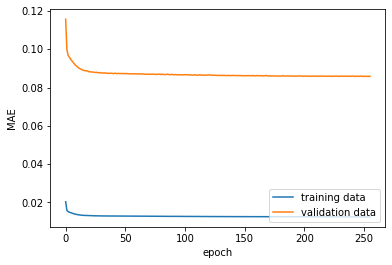

In [8]:
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['loss']) # replace with accuracy/MAE
plt.plot(history.history['mae']) # replace with val_accuracy, etc.
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

###Early Stopping

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# File name must be in quotes
callback_a = ModelCheckpoint(filepath = "your_model.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)

# The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

model2 = Sequential()
model2.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
model2.add(Dense(7, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [10]:
model2.compile(loss='mse', optimizer = 'adam', metrics=['mae'])

start_time = time.time()
history = model2.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=256, batch_size=128, callbacks = [callback_a, callback_b]) 
callBackTime = time.time() - start_time

Epoch 1/256
169/179 [===========================>..] - ETA: 0s - loss: 0.0219 - mae: 0.1205
Epoch 00001: val_loss improved from inf to 0.01787, saving model to your_model.hdf5
179/179 [==============================] - 1s 3ms/step - loss: 0.0217 - mae: 0.1201 - val_loss: 0.0179 - val_mae: 0.1085
Epoch 2/256
169/179 [===========================>..] - ETA: 0s - loss: 0.0169 - mae: 0.1037
Epoch 00002: val_loss improved from 0.01787 to 0.01601, saving model to your_model.hdf5
179/179 [==============================] - 1s 3ms/step - loss: 0.0168 - mae: 0.1035 - val_loss: 0.0160 - val_mae: 0.1005
Epoch 3/256
164/179 [==========================>...] - ETA: 0s - loss: 0.0157 - mae: 0.0991
Epoch 00003: val_loss improved from 0.01601 to 0.01520, saving model to your_model.hdf5
179/179 [==============================] - 1s 3ms/step - loss: 0.0157 - mae: 0.0988 - val_loss: 0.0152 - val_mae: 0.0968
Epoch 4/256
172/179 [===========================>..] - ETA: 0s - loss: 0.0150 - mae: 0.0962
Epoch 000

In [11]:
# File name must be in quotes
model2.load_weights("your_model.hdf5")

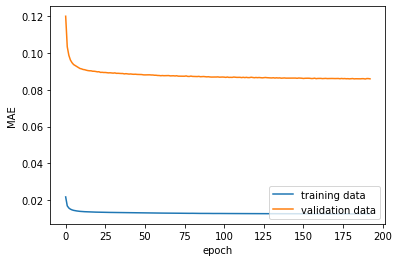

In [12]:
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['loss']) # replace with accuracy/MAE
plt.plot(history.history['mae']) # replace with val_accuracy, etc.
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [14]:
print(callBackTime)

109.46020174026489


In [13]:
print(noCallBackTime)

139.9830937385559


In [16]:
percentFaster = noCallBackTime/callBackTime
print(percentFaster)

1.2788492211143365


a. Almost always, training with early stopping finishes faster (because it stops early). Approximately, how long does it take for your training to finish with and without early stopping?

About 27.9% faster with early stopping


b. When model checkpointing, your checkpointed model will almost always be more accurate on the validation set. What is the MAE on the Validation set with and without model checkpointing?

Early stopping MAE: 0.0860

Normal MAE: 0.0858
